# Importing required modules

In [50]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime


In [17]:
# importing the dataset
dataset = pd.read_csv('emails.csv', encoding='latin-1')
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [18]:
# count observations in each label
dataset.spam.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [19]:
# for splitting dataset into train set and test set
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(dataset["text"],dataset["spam"], test_size = 0.2, random_state = 10)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4582,)
(1146,)
(4582,)
(1146,)


In [22]:
# for vectorizing words
from sklearn.feature_extraction.text import CountVectorizer
label_counts = dataset['spam'].value_counts()

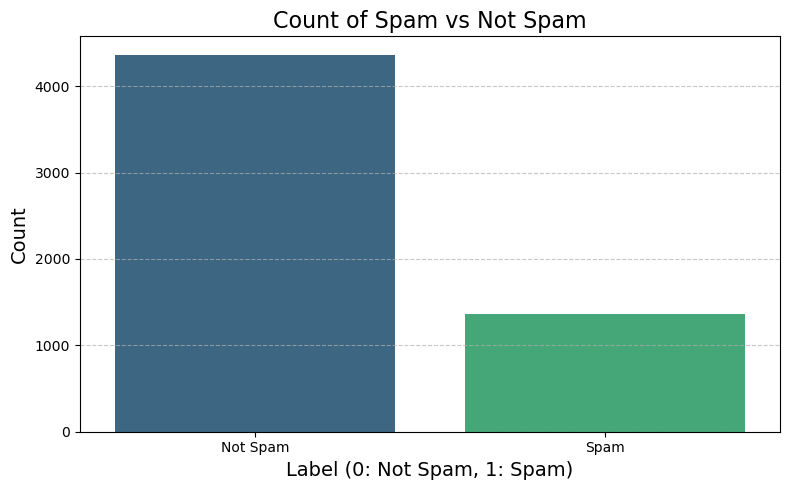

In [23]:
# Create a count plot to visualize the counts of each category
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='spam', palette='viridis')
plt.title('Count of Spam vs Not Spam', fontsize=16)
plt.xlabel('Label (0: Not Spam, 1: Spam)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Not Spam', 'Spam'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [24]:
vect = CountVectorizer(stop_words='english')
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [25]:
# Assuming 'vect' is your CountVectorizer or TfidfVectorizer instance
print(vect.get_feature_names_out()[0:20]) 
print(vect.get_feature_names_out()[-20:])  


['00' '000' '0000' '00000000' '000000000003619' '000000000003991'
 '000000000003997' '000000000005168' '000000000005411' '000000000005413'
 '000000000005820' '000000000006238' '000000000007494' '000000000007498'
 '000000000007876' '000000000010552' '000000000011185' '000000000012677'
 '000000000012735' '000000000012736']
['zunaechst' 'zunf' 'zur' 'zurich' 'zusaetzlich' 'zuzana' 'zwabic'
 'zwischen' 'zwlaszcza' 'zwrocic' 'zwwyw' 'zwzm' 'zxghlajf' 'zyban' 'zyc'
 'zygoma' 'zymg' 'zzn' 'zzncacst' 'zzzz']


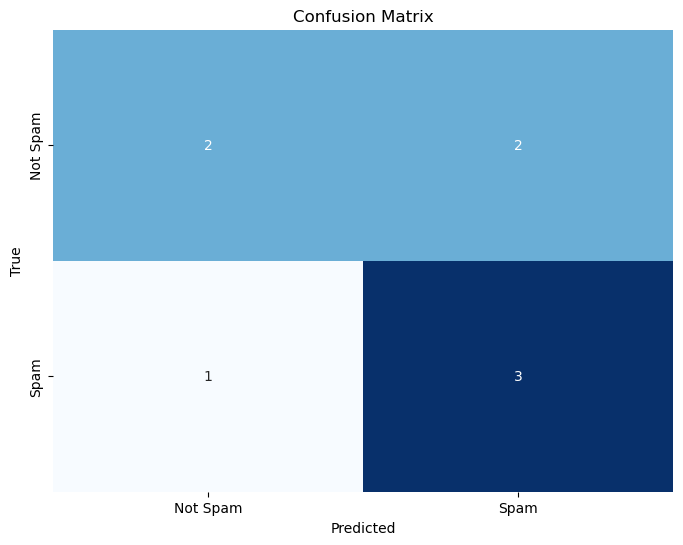

In [36]:

# Sample data: Replace these with your actual predictions and true labels
y_true = [0, 1, 0, 1, 1, 0, 0, 1] 
y_pred = [0, 1, 1, 1, 0, 0, 1, 1]  

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [37]:
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)
type(X_test_df)

scipy.sparse._csr.csr_matrix

In [38]:
prediction = dict()
# Naive Bayes Machine Learning Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB()

In [39]:
prediction["naive_bayes"] = model.predict(X_test_df)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
# get accuracy
accuracy_score(y_test,prediction["naive_bayes"])

0.9912739965095986

In [42]:
print(classification_report(y_test, prediction['naive_bayes'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       861
        Spam       0.99      0.98      0.98       285

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [46]:
def classify(user_input):
    # Create a DataFrame from the user input
    custom_train = pd.DataFrame({'text': [user_input]})
    
    # Extract the text for prediction
    text = custom_train['text'].values
    return model.predict(vect.transform(text))

# Example usage
text = "free"
if classify(text):
    print('The email is spam')
else:
    print('The email is ham')


The email is spam
